In [5]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [6]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [58]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import desc

In [11]:
# create engine to hawaii.sqlite
# database 
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [12]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [13]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [14]:
# Save references to each table
# python class.
Measurement = Base.classes.measurement
Station = Base.classes.station

In [15]:
#Station

sqlalchemy.ext.automap.station

In [16]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [18]:
# Find the most recent date in the data set.
# select date from Measurement order by date desc limit 1.
# select max(date) from Measurement;
session.query(func.max(Measurement.date)).all()[0]

('2017-08-23',)

In [50]:
# end_date = session.query(func.max(Measurement.date)).all()[0][0]
# end_datetime = dt.datetime.strptime(end_date, '%Y-%m-%d')
# end_datetime 

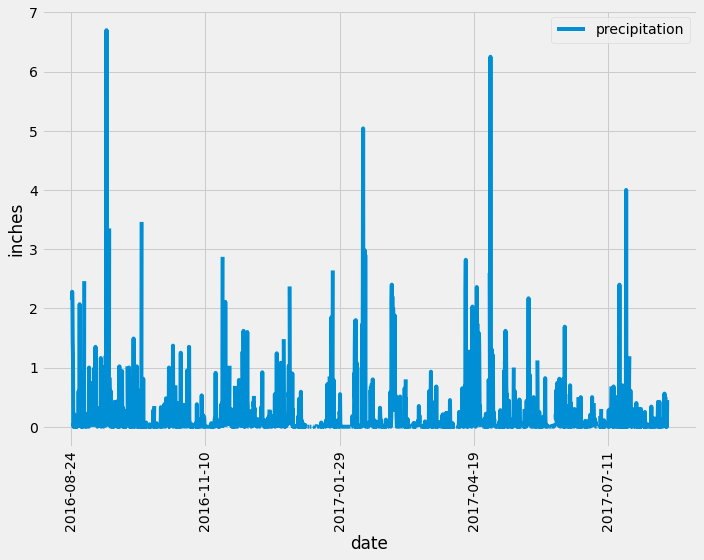

In [51]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#session.query(Measurement).fiter(Measurement.date >= '2022-06-01').all()

# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
end_date = session.query(func.max(Measurement.date)).all()[0][0]
end_datetime = dt.datetime.strptime(end_date, '%Y-%m-%d')
start_datetime = end_datetime - dt.timedelta(days = 365)

results = session.query(Measurement).filter(Measurement.date >= start_datetime).all()
date_precipitations =[ {"date":measurement.date ,"precipitation":measurement.prcp } for measurement in results]
df = pd.DataFrame(date_precipitations)
df.sort_values(by='date',inplace = True)
# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame. Explicitly set the column names


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data
df.plot(x='date',y='precipitation',ylabel='inches',xlabel='date',figsize= (10,8),rot=90)
plt.tight_layout()
plt.show()

In [54]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [55]:
# Design a query to calculate the total number of stations in the dataset
session.query(Station).count()

9

In [59]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
results = session.query( Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).order_by(desc(func.count(Measurement.station))).all()
results

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [62]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active_id = results[0][0]
results = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs) ).filter(Measurement.station ==active_id ).all()
results

[(54.0, 85.0, 71.66378066378067)]

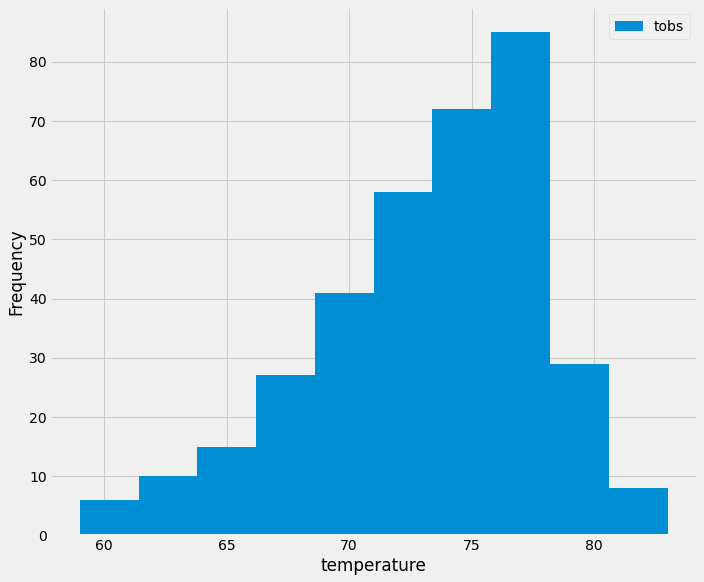

In [73]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
end_date = session.query(func.max(Measurement.date)).all()[0][0]
end_datetime = dt.datetime.strptime(end_date, '%Y-%m-%d')
start_datetime = end_datetime - dt.timedelta(days = 365)

results = session.query(Measurement).filter(Measurement.date >= start_datetime).filter(Measurement.station == active_id).all()
date_tobses =[ {"tobs":measurement.tobs } for measurement in results]
df = pd.DataFrame(date_tobses)
df.plot(kind ='hist',figsize= (10,8))
plt.tight_layout()
plt.xlabel("temperature")
plt.show()

# Close Session

In [68]:
# Close Session
session.close()